In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [2]:
# load as Pandas dataframe
sample_json_df = pd.read_json('world_bank_projects.json')
sample_json_df.head()

,sector,supplementprojectflg,projectfinancialtype,prodline,mjtheme,idacommamt,impagency,project_name,mjthemecode,closingdate,...,majorsector_percent,board_approval_month,theme_namecode,countryname,url,source,projectstatusdisplay,ibrdcommamt,sector_namecode,_id
0,"[{'Name': 'Primary education'}, {'Name': 'Seco...",N,IDA,PE,[Human development],130000000,MINISTRY OF EDUCATION,Ethiopia General Education Quality Improvement...,"8,11",2018-07-07T00:00:00Z,...,"[{'Percent': 46, 'Name': 'Education'}, {'Perce...",November,"[{'code': '65', 'name': 'Education for all'}]",Federal Democratic Republic of Ethiopia,http://www.worldbank.org/projects/P129828/ethi...,IBRD,Active,0,"[{'code': 'EP', 'name': 'Primary education'}, ...",{'$oid': '52b213b38594d8a2be17c780'}
1,[{'Name': 'Public administration- Other social...,N,OTHER,RE,"[Economic management, Social protection and ri...",0,MINISTRY OF FINANCE,TN: DTF Social Protection Reforms Support,"1,6",NaN,...,"[{'Percent': 70, 'Name': 'Public Administratio...",November,"[{'code': '24', 'name': 'Other economic manage...",Republic of Tunisia,http://www.worldbank.org/projects/P144674?lang=en,IBRD,Active,0,"[{'code': 'BS', 'name': 'Public administration...",{'$oid': '52b213b38594d8a2be17c781'}
2,[{'Name': 'Rural and Inter-Urban Roads and Hig...,Y,IDA,PE,"[Trade and integration, Public sector governan...",6060000,MINISTRY OF TRANSPORT AND COMMUNICATIONS,Tuvalu Aviation Investment Project - Additiona...,"5,2,11,6",NaN,...,"[{'Percent': 100, 'Name': 'Transportation'}]",November,"[{'code': '47', 'name': 'Regional integration'...",Tuvalu,http://www.worldbank.org/projects/P145310?lang=en,IBRD,Active,0,"[{'code': 'TI', 'name': 'Rural and Inter-Urban...",{'$oid': '52b213b38594d8a2be17c782'}
3,[{'Name': 'Other social services'}],N,OTHER,RE,"[Social dev/gender/inclusion, Social dev/gende...",0,LABOR INTENSIVE PUBLIC WORKS PROJECT PMU,Gov't and Civil Society Organization Partnership,"7,7",NaN,...,"[{'Percent': 100, 'Name': 'Health and other so...",October,"[{'code': '57', 'name': 'Participation and civ...",Republic of Yemen,http://www.worldbank.org/projects/P144665?lang=en,IBRD,Active,0,"[{'code': 'JB', 'name': 'Other social services'}]",{'$oid': '52b213b38594d8a2be17c783'}
4,[{'Name': 'General industry and trade sector'}...,N,IDA,PE,"[Trade and integration, Financial and private ...",13100000,MINISTRY OF TRADE AND INDUSTRY,Second Private Sector Competitiveness and Econ...,"5,4",2019-04-30T00:00:00Z,...,"[{'Percent': 50, 'Name': 'Industry and trade'}...",October,"[{'code': '45', 'name': 'Export development an...",Kingdom of Lesotho,http://www.worldbank.org/projects/P144933/seco...,IBRD,Active,0,"[{'code': 'YZ', 'name': 'General industry and ...",{'$oid': '52b213b38594d8a2be17c784'}


In [3]:
sample_json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   sector                    500 non-null    object
 1   supplementprojectflg      498 non-null    object
 2   projectfinancialtype      500 non-null    object
 3   prodline                  500 non-null    object
 4   mjtheme                   491 non-null    object
 5   idacommamt                500 non-null    int64 
 6   impagency                 472 non-null    object
 7   project_name              500 non-null    object
 8   mjthemecode               500 non-null    object
 9   closingdate               370 non-null    object
 10  totalcommamt              500 non-null    int64 
 11  id                        500 non-null    object
 12  mjsector_namecode         500 non-null    object
 13  docty                     446 non-null    object
 14  sector1                   

## solution1: top ten counties with most projects 

In [4]:
sample_json_df.countryshortname.nunique()

118

In [5]:
sample_json_df.countryshortname.value_counts().head(10)

Indonesia             19
China                 19
Vietnam               17
India                 16
Yemen, Republic of    13
Bangladesh            12
Morocco               12
Nepal                 12
Mozambique            11
Africa                11
Name: countryshortname, dtype: int64

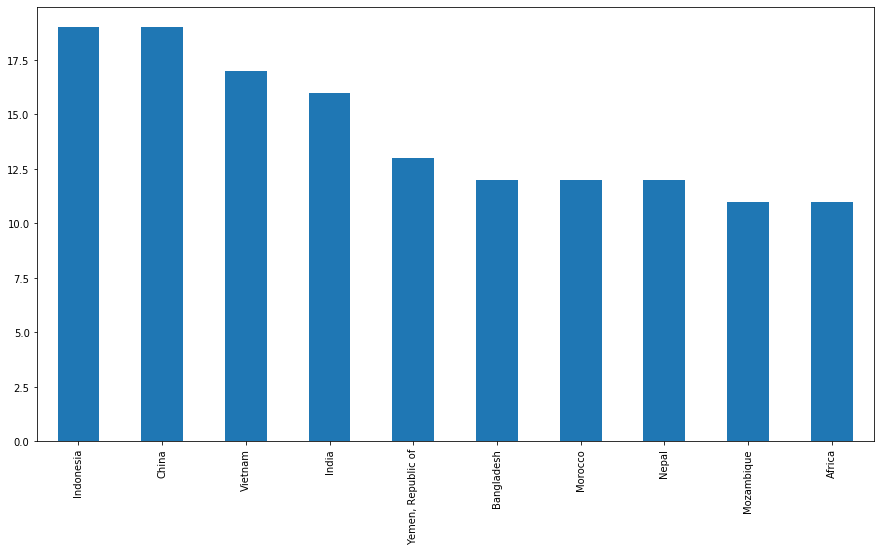

In [6]:
sample_json_df.countryshortname.value_counts().head(10).plot(kind = "bar",figsize = (15,8))
plt.show()

## solution2: Find the top 10 major project themes (using column 'mjtheme_namecode')

In [7]:
sample_json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   sector                    500 non-null    object
 1   supplementprojectflg      498 non-null    object
 2   projectfinancialtype      500 non-null    object
 3   prodline                  500 non-null    object
 4   mjtheme                   491 non-null    object
 5   idacommamt                500 non-null    int64 
 6   impagency                 472 non-null    object
 7   project_name              500 non-null    object
 8   mjthemecode               500 non-null    object
 9   closingdate               370 non-null    object
 10  totalcommamt              500 non-null    int64 
 11  id                        500 non-null    object
 12  mjsector_namecode         500 non-null    object
 13  docty                     446 non-null    object
 14  sector1                   

In [8]:
sample_json_df.mjtheme_namecode[0]

[{'code': '8', 'name': 'Human development'}, {'code': '11', 'name': ''}]

In [9]:
## first step is to fill name values 
code = []
project_name = []

def some_func(element):
    for dic in element:
        code.append(dic["code"])
        project_name.append(dic["name"])

In [10]:
sample_json_df.mjtheme_namecode.apply(some_func)

0      None
1      None
2      None
3      None
4      None
       ... 
495    None
496    None
497    None
498    None
499    None
Name: mjtheme_namecode, Length: 500, dtype: object

In [11]:
sample = pd.DataFrame({"code":code,"project_name":project_name})
sample.code = sample.code.astype("int")
sample.sort_values("code",inplace=True)

In [12]:
sample

,code,project_name
1114,1,
647,1,Economic management
1260,1,Economic management
648,1,Economic management
1437,1,
...,...,...
1162,11,Environment and natural resources management
511,11,Environment and natural resources management
519,11,Environment and natural resources management
1180,11,Environment and natural resources management


In [13]:
sample2 = sample.copy()

In [14]:
# where ever name is not there making it nan
sample2["project_name"] = np.where(sample2.project_name == "",np.nan,sample2.project_name)

In [15]:
sample2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1499 entries, 1114 to 1181
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   code          1499 non-null   int32 
 1   project_name  1377 non-null   object
dtypes: int32(1), object(1)
memory usage: 29.3+ KB


In [16]:
sample2

,code,project_name
1114,1,NaN
647,1,Economic management
1260,1,Economic management
648,1,Economic management
1437,1,NaN
...,...,...
1162,11,Environment and natural resources management
511,11,Environment and natural resources management
519,11,Environment and natural resources management
1180,11,Environment and natural resources management


In [17]:
sample.dropna(inplace=True)

In [18]:
sample2 = sample2.groupby("code").first()

In [19]:
sample = sample.merge(sample2,on="code",how = "inner")

In [20]:
sample

,code,project_name_x,project_name_y
0,1,,Economic management
1,1,Economic management,Economic management
2,1,Economic management,Economic management
3,1,Economic management,Economic management
4,1,,Economic management
...,...,...,...
1494,11,Environment and natural resources management,Environment and natural resources management
1495,11,Environment and natural resources management,Environment and natural resources management
1496,11,Environment and natural resources management,Environment and natural resources management
1497,11,Environment and natural resources management,Environment and natural resources management


In [21]:
sample.drop("project_name_x",axis = "columns",inplace=True)

In [22]:
sample.project_name_y.value_counts().head(10)

Environment and natural resources management    250
Rural development                               216
Human development                               210
Public sector governance                        199
Social protection and risk management           168
Financial and private sector development        146
Social dev/gender/inclusion                     130
Trade and integration                            77
Urban development                                50
Economic management                              38
Name: project_name_y, dtype: int64

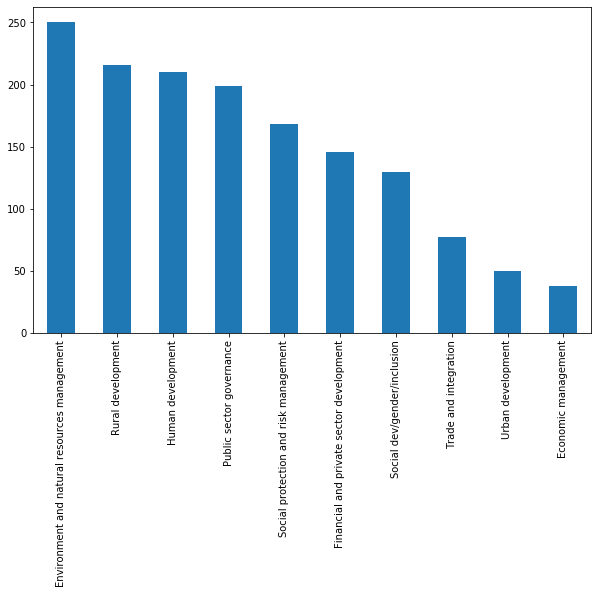

In [23]:
sample.project_name_y.value_counts().head(10).plot(kind = "bar",figsize = (10,6))
plt.show()

## solution3: above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [24]:
def fill_value_func(element):
    
    for dic in element:
        if dic["name"] == "":
            dic["name"] = sample2.loc[int(dic["code"])][0]

In [25]:
sample_json_df.mjtheme_namecode.apply(fill_value_func)

0      None
1      None
2      None
3      None
4      None
       ... 
495    None
496    None
497    None
498    None
499    None
Name: mjtheme_namecode, Length: 500, dtype: object

In [26]:
# all values filled in 
sample_json_df.mjtheme_namecode[0]

[{'code': '8', 'name': 'Human development'},
 {'code': '11', 'name': 'Environment and natural resources management'}]